## AI Programming with Python Nanodegree: Image Classifier Project
  - Do not make changes to the first 2 code cells, they are being used for setting up the `flowers` dataset and `cat_to_name.json`. Start writing code from third code cell onwards.
  - To use this notebook: `File > Save a copy in Drive`
  

### Code Explanation:

- **Setting Up Flower Dataset:**
  - `data_dir = './flowers'`: Defines the directory path for the flower dataset.
  - `FLOWERS_DIR = Path(data_dir)`: Uses `Path` from `pathlib` for handling PosixPath.

- **Downloading and Extracting Dataset:**
  - `if not FLOWERS_DIR.is_dir()`: Checks if the dataset directory exists.
    - `FLOWERS_DIR.mkdir(parents=True, exist_ok=True)`: Creates the directory if not present.
  - `TARBALL = FLOWERS_DIR / "flower_data.tar.gz"`: Defines the tarball path.
  - Downloads and extracts the dataset if not already present:
    - `request = requests.get(...)`: Downloads the 'flower_data.tar.gz' file.
    - `with open(TARBALL, "wb") as file_ref`: Writes the downloaded content to the tarball.
    - `with tarfile.open(TARBALL, "r") as tar_ref`: Extracts the tarball contents to the dataset directory.

- **Cleaning Up:**
  - `os.remove(TARBALL)`: Deletes the downloaded tarball to save space.

- **Status Messages:**
  - Prints informative messages about the directory creation, download, extraction, and cleanup.


In [ ]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Directory created: ./flowers

[INFO] Downloading the file 'flower_data.tar.gz' to ./flowers
[INFO] 'flower_data.tar.gz' saved to ./flowers

[INFO] Extracting the downloaded tarball to ./flowers
[INFO] 'flower_data.tar.gz' extracted successfully to ./flowers

[INFO] Deleting the tarball to save space.


### Code Explanation:

- **Creating a JSON File for Flower Categories:**
  - `data`: Defines a dictionary containing numerical keys and corresponding flower names.
  - `with open('cat_to_name.json', 'w') as file`: Opens the file 'cat_to_name.json' for writing.
  - `json.dump(data, file)`: Writes the dictionary data to the JSON file.

- **Interpreting the Output:**
  - The code creates a JSON file named 'cat_to_name.json' that serves as a mapping between numerical keys and flower names. This mapping can be useful for associating numerical labels with human-readable names in machine learning tasks.


In [ ]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torchvision.models as models
from PIL import Image
import json
from matplotlib.ticker import FormatStrFormatter

In [ ]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [ ]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

validation_transforms = transforms.Compose([transforms.Resize(256),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406],
                                                                 [0.229, 0.224, 0.225])])


# TODO: Load the datasets with ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
validation_data = datasets.ImageFolder(valid_dir, transform=validation_transforms)
test_data = datasets.ImageFolder(test_dir ,transform = test_transforms)

# TODO: Using the image datasets and the trainforms, define the dataloaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
vloader = torch.utils.data.DataLoader(validation_data, batch_size =32,shuffle = True)
testloader = torch.utils.data.DataLoader(test_data, batch_size = 20, shuffle = True)

In [ ]:
import json

with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

In [ ]:
structures = {"vgg16":25088,
              "densenet121" : 1024,
              "alexnet" : 9216 }

In [ ]:
def nn_setup(structure='vgg16',dropout=0.5, hidden_layer1 = 120,lr = 0.001):


    if structure == 'vgg16':
        model = models.vgg16(pretrained=True)
    elif structure == 'densenet121':
        model = models.densenet121(pretrained=True)
    elif structure == 'alexnet':
        model = models.alexnet(pretrained = True)
    else:
        print("Im sorry but {} is not a valid model.Did you mean vgg16,densenet121,or alexnet?".format(structure))



    for param in model.parameters():
        param.requires_grad = False

        from collections import OrderedDict
        classifier = nn.Sequential(OrderedDict([
            ('dropout',nn.Dropout(dropout)),
            ('inputs', nn.Linear(structures[structure], hidden_layer1)),
            ('relu1', nn.ReLU()),
            ('hidden_layer1', nn.Linear(hidden_layer1, 90)),
            ('relu2',nn.ReLU()),
            ('hidden_layer2',nn.Linear(90,80)),
            ('relu3',nn.ReLU()),
            ('hidden_layer3',nn.Linear(80,102)),
            ('output', nn.LogSoftmax(dim=1))
                          ]))
        model.classifier = classifier
        criterion = nn.NLLLoss()
        optimizer = optim.Adam(model.classifier.parameters(), lr )
        model.cuda()

        return model , optimizer ,criterion



model,optimizer,criterion = nn_setup('densenet121')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 92.7MB/s]


In [ ]:
# Putting the above into functions, so they can be used later

epochs = 12
print_every = 5
steps = 0
loss_show=[]

# change to cuda
model.to('cuda')

for e in range(epochs):
    running_loss = 0
    for ii, (inputs, labels) in enumerate(trainloader):
        steps += 1

        inputs,labels = inputs.to('cuda'), labels.to('cuda')

        optimizer.zero_grad()

        # Forward and backward passes
        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps % print_every == 0:
            model.eval()
            vlost = 0
            accuracy=0

            for ii, (inputs2,labels2) in enumerate(vloader):
                optimizer.zero_grad()

                inputs2, labels2 = inputs2.to('cuda:0') , labels2.to('cuda:0')
                model.to('cuda:0')
                with torch.no_grad():
                    outputs = model.forward(inputs2)
                    vlost = criterion(outputs,labels2)
                    ps = torch.exp(outputs).data
                    equality = (labels2.data == ps.max(1)[1])
                    accuracy += equality.type_as(torch.FloatTensor()).mean()

            vlost = vlost / len(vloader)
            accuracy = accuracy /len(vloader)



            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every),
                  "Validation Lost {:.4f}".format(vlost),
                   "Accuracy: {:.4f}".format(accuracy))


            running_loss = 0



Epoch: 1/12...  Loss: 4.6148 Validation Lost 0.1771 Accuracy: 0.0214
Epoch: 1/12...  Loss: 4.6074 Validation Lost 0.1751 Accuracy: 0.0283
Epoch: 1/12...  Loss: 4.5344 Validation Lost 0.1733 Accuracy: 0.0252
Epoch: 1/12...  Loss: 4.5664 Validation Lost 0.1773 Accuracy: 0.0252
Epoch: 1/12...  Loss: 4.4835 Validation Lost 0.1775 Accuracy: 0.0252
Epoch: 1/12...  Loss: 4.4408 Validation Lost 0.1675 Accuracy: 0.0397
Epoch: 1/12...  Loss: 4.4833 Validation Lost 0.1722 Accuracy: 0.0565
Epoch: 1/12...  Loss: 4.3993 Validation Lost 0.1715 Accuracy: 0.0865
Epoch: 1/12...  Loss: 4.3916 Validation Lost 0.1696 Accuracy: 0.0694
Epoch: 1/12...  Loss: 4.2427 Validation Lost 0.1672 Accuracy: 0.1034
Epoch: 1/12...  Loss: 4.2399 Validation Lost 0.1662 Accuracy: 0.1187
Epoch: 1/12...  Loss: 4.1939 Validation Lost 0.1679 Accuracy: 0.1187
Epoch: 1/12...  Loss: 4.0353 Validation Lost 0.1597 Accuracy: 0.1485
Epoch: 1/12...  Loss: 3.8705 Validation Lost 0.1380 Accuracy: 0.1311
Epoch: 1/12...  Loss: 3.9056 Valid

In [ ]:
def check_accuracy_on_test(testloader):
    correct = 0
    total = 0
    model.to('cuda:0')
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to('cuda'), labels.to('cuda')
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

check_accuracy_on_test(testloader)

Accuracy of the network on the test images: 83 %


In [ ]:
# TODO: Save the checkpoint
model.class_to_idx = train_data.class_to_idx
model.cpu
torch.save({'structure' :'densenet121',
            'hidden_layer1':120,
            'state_dict':model.state_dict(),
            'class_to_idx':model.class_to_idx},
            'checkpoint.pth')

In [ ]:
# TODO: Write a function that loads a checkpoint and rebuilds the model
def load_model(path):
    checkpoint = torch.load('checkpoint.pth')
    structure = checkpoint['structure']
    hidden_layer1 = checkpoint['hidden_layer1']
    model,_,_ = nn_setup(structure , 0.5,hidden_layer1)
    model.class_to_idx = checkpoint['class_to_idx']
    model.load_state_dict(checkpoint['state_dict'])


load_model('checkpoint.pth')
print(model)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
def process_image(image):
    img_pil = Image.open(image)

    adjustments = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    img_tensor = adjustments(img_pil)

    return img_tensor


    # TODO: Process a PIL image for use in a PyTorch model

img = (data_dir + '/test' + '/1/' + 'image_06752.jpg')
img = process_image(img)
print(img.shape)


torch.Size([3, 224, 224])


<Axes: >

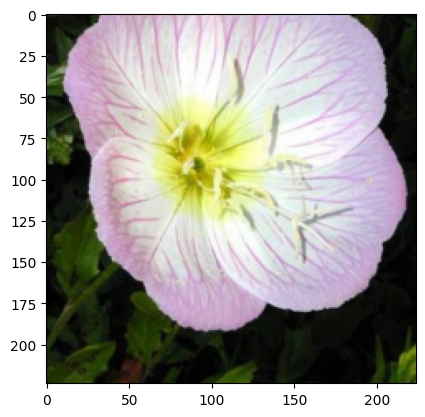

In [ ]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()

    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax


imshow(process_image("flowers/test/1/image_06743.jpg"))

In [ ]:
''' Predict the class (or classes) of an image using a trained deep learning model.
'''
model.class_to_idx =train_data.class_to_idx

ctx = model.class_to_idx


def predict(image_path, model, topk=5):
    model.to('cuda:0')
    img_torch = process_image(image_path)
    img_torch = img_torch.unsqueeze_(0)
    img_torch = img_torch.float()

    with torch.no_grad():
        output = model.forward(img_torch.cuda())

    probability = F.softmax(output.data,dim=1)

    return probability.topk(topk)

    # TODO: Implement the code to predict the class from an image file

In [ ]:
img = (data_dir + '/test' + '/10/' + 'image_07104.jpg')
val1, val2 = predict(img, model)
print(val1)
print(val2)

tensor([[0.6344, 0.2133, 0.1044, 0.0180, 0.0128]], device='cuda:0')
tensor([[ 1, 31,  8, 11, 24]], device='cuda:0')


In [ ]:
def check_sanity():
    plt.rcParams["figure.figsize"] = (10,5)
    plt.subplot(211)

    index = 1
    path = test_dir + '/1/image_06743.jpg'

    probabilities = predict(path, model)
    image = process_image(path)

    # Convert CUDA tensors to CPU tensors
    probabilities_cpu = [tensor.cpu() for tensor in probabilities]

    axs = imshow(image, ax = plt)
    axs.axis('off')
    axs.title(cat_to_name[str(index)])
    plt.show()

    a = np.array(probabilities_cpu[0][0])
    b = [cat_to_name[str(index + 1)] for index in np.array(probabilities_cpu[1][0])]

    N=float(len(b))
    fig,ax = plt.subplots(figsize=(8,3))
    width = 0.8
    tickLocations = np.arange(N)
    ax.bar(tickLocations, a, width, linewidth=4.0, align='center')
    ax.set_xticks(ticks=tickLocations)
    ax.set_xticklabels(b)
    ax.set_xlim(min(tickLocations)-0.6,max(tickLocations)+0.6)
    ax.set_yticks([0.2,0.4,0.6,0.8,1,1.2])
    ax.set_ylim((0,1))
    ax.yaxis.grid(True)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.show()



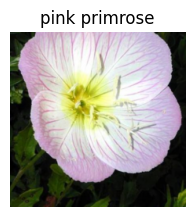

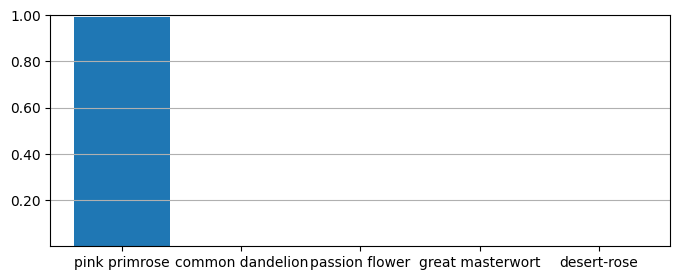

In [ ]:
check_sanity()